# Credit Risk Resampling Techniques

In [190]:
import warnings
warnings.filterwarnings('ignore')

In [191]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Read the CSV into DataFrame

In [192]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


In [193]:
# Add LabelEncoder because homeowner column is a string, convert to float.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encoding homeowner column
encoder.fit(df["homeowner"])
df["homeowner"] = encoder.transform(df["homeowner"])

df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,1,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,1,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,2,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,1,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,0,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [194]:
# Create our features
X = df.drop(columns="loan_status") # YOUR CODE HERE

# Create our target
y = df["loan_status"] # YOUR CODE HERE

In [195]:
X.describe()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,0.606144,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,0.667811,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,0.000000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,0.000000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,1.000000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,1.000000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,2.000000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [196]:
# Check the balance of our target values
y.value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [197]:
# Create X_train, X_test, y_train, y_test
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, 
                                                   y, 
                                                   random_state=1, 
                                                   stratify=y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [198]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
# YOUR CODE HERE
scaler = StandardScaler()

In [199]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# YOUR CODE HERE
X_scaler = scaler.fit(X_train)

In [200]:
# Scale the training and testing data
# YOUR CODE HERE
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Simple Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [202]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.8041461911615757

In [203]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  622,     3],
       [ 7258, 11501]], dtype=int64)

In [204]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.08      1.00      0.61      0.15      0.78      0.63       625
   low_risk       1.00      0.61      1.00      0.76      0.78      0.59     18759

avg / total       0.97      0.63      0.98      0.74      0.78      0.59     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [205]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE
Counter(y_resampled)

Counter({'low_risk': 56277, 'high_risk': 56277})

In [206]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [207]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.8041461911615757

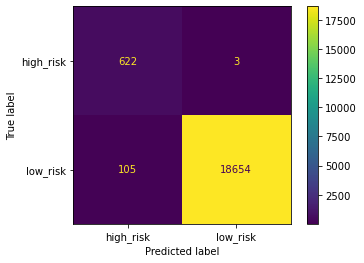

In [208]:
# Display the confusion matrix
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [209]:
# Print the imbalanced classification report
# YOUR CODE HERE
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       1.00      0.99      1.00      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [210]:
# Resample the training data with SMOTE
# YOUR CODE HERE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
    X_train, y_train
)

# View the count of target classes with Counter
# YOUR CODE HERE
from collections import Counter

Counter(y_resampled)

Counter({'low_risk': 56277, 'high_risk': 56277})

In [211]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [212]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9948279972279972

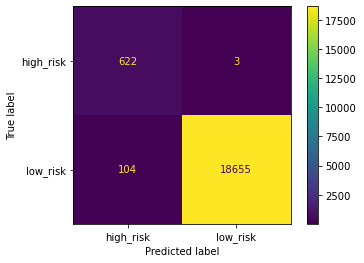

In [213]:
# Display the confusion matrix
# YOUR CODE HERE
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [214]:
# Print the imbalanced classification report
# YOUR CODE HERE
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       1.00      0.99      1.00      0.99      0.99      0.99     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [215]:
# Resample the data using the ClusterCentroids resampler
# YOUR CODE HERE
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE
from collections import Counter

Counter(y_resampled)

Counter({'high_risk': 1875, 'low_risk': 1875})

In [216]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [217]:
# Calculate the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9948279972279972

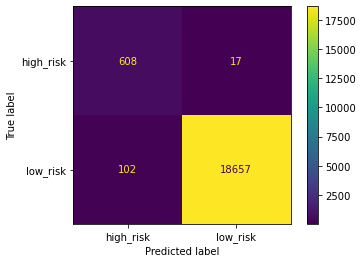

In [218]:
# Display the confusion matrix
# YOUR CODE HERE
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [219]:
# Print the imbalanced classification report
# YOUR CODE HERE
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      0.97      0.99      0.91      0.98      0.97       625
   low_risk       1.00      0.99      0.97      1.00      0.98      0.97     18759

avg / total       0.99      0.99      0.97      0.99      0.98      0.97     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [220]:
# Resample the training data with SMOTEENN
# YOUR CODE HERE
from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state=1)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE
Counter(y_resampled)

Counter({'high_risk': 55299, 'low_risk': 55918})

In [221]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [222]:
# Calculate the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.994748035609574

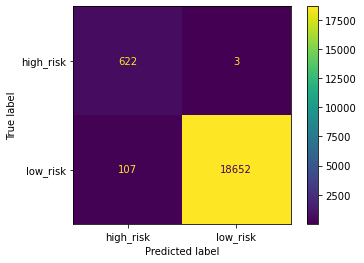

In [223]:
# Display the confusion matrix
# YOUR CODE HERE
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [224]:
# Print the imbalanced classification report
# YOUR CODE HERE
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       1.00      0.99      1.00      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

   YOUR ANSWER HERE. - The SMOTE and Cluster Centroids models had the best accuracy score, each scoring 0.994827

2. Which model had the best recall score?

    YOUR ANSWER HERE. - SMOTE, SMOTEENN, and Naive Random Oversampliong had the same recall score.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE. - SMOTE, SMOTEENN, and Naive Random Oversampliong had the same geometric mean score.
